In [2]:
#Solution: 1 We have the min and max temperatures in a city In India for each months of the year.
#We would like to find a function to describe this and show it graphically, the dataset
#given below.
# 1. fitting it to the periodic function

In [3]:
import scipy as sc
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
Months = np.arange(12)
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])

In [6]:
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [7]:
from scipy import optimize 

In [8]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

In [9]:
res_max, cov_max = optimize.curve_fit(yearly_temps, Months,Max, [30, 10, 0]) 
res_min, cov_min = optimize.curve_fit(yearly_temps, Months,Min, [-50, 20, 0])

In [10]:
# 2. plot the fit

Text(0,0.5,'Temperature ($^\\circ$C)')

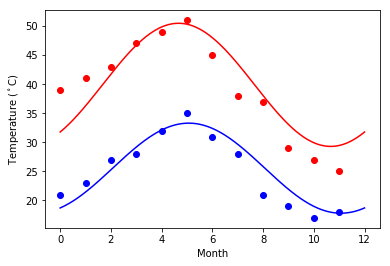

In [11]:
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(Months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(Months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

In [12]:
#Solution 2: Matplotlib
#1. Create a pie chart presenting the male/female proportion

In [13]:
import pandas as pd
import seaborn as sb

In [14]:
url= 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

In [15]:
titanic = pd.read_csv(url)

In [16]:
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [17]:
#group data by sex to plot in piechart

In [18]:
x = titanic.groupby(['sex'])['pclass'].agg('count')

In [19]:
var = titanic.groupby(['sex']).count().stack()
temp = var.unstack() 

In [20]:
x

sex
female    466
male      843
Name: pclass, dtype: int64

In [21]:
label = temp.index

Text(0.5,1,'Distribution of male and female')

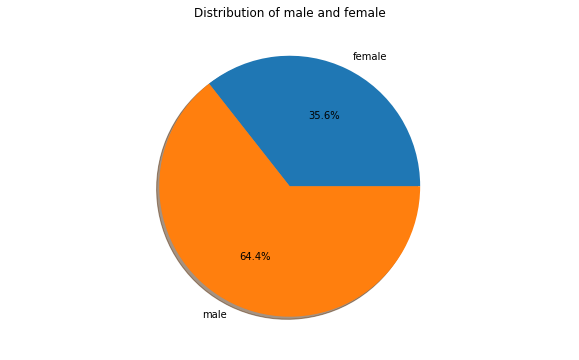

In [53]:
plt.figure(figsize = (10,6))
plt.axis("equal")
plt.pie(x, labels = label, autopct ="%1.1f%%",shadow = True)
plt.title("Distribution of male and female")

In [23]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [24]:
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


Text(0.5,1,'Fare paid and the Age by Sex')

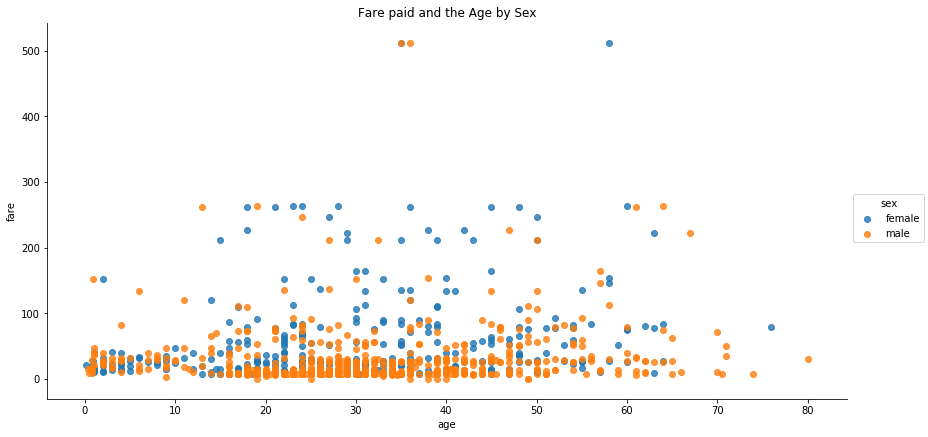

In [56]:
sb.lmplot( x="age", y="fare", data=titanic, fit_reg=False, hue='sex', size = 6, aspect = 2,legend= True)
plt.title('Fare paid and the Age by Sex')